In [1]:
import jax
key = jax.random.PRNGKey(0)
import numpy as np
from mrfx.experiments import time_complete_sampling, plot_benchmark
from mrfx.samplers import GibbsSampler, ChromaticGibbsSampler
from mrfx.models import Potts
K = 2
beta = 1.
potts_model = Potts(K, beta, neigh_size=1)

Ks = np.arange(2, 8)
sizes = [(2 ** e, 2 ** e) for e in range(4, 10)]
reps = 10

key, subkey = jax.random.split(key, 2)
times, n_iterations = time_complete_sampling(ChromaticGibbsSampler, Potts, subkey, Ks, sizes, reps,
                                             kwargs_sampler={"eps":0.05, "max_iter":10000, "color_update_type":"vmap_in_color"},
                                             kwargs_model={"beta":1.})

/home/hugo/Documents/recherche/gum/code/mrfx_private/mrfx/experiments/_benchmark.py:152: UserWarning: A JAX array is being set as static! This can result in unexpected behavior and is usually a mistake to do.
  model = Model(k, **kwargs_model)


Rep ( / 10): Stopping Gibbs sampler, cause: Convergence criterion is reached
Stopping Gibbs sampler, cause: Convergence criterion is reached
1 Stopping Gibbs sampler, cause: Convergence criterion is reached
2 Stopping Gibbs sampler, cause: Convergence criterion is reached
3 Stopping Gibbs sampler, cause: Convergence criterion is reached
4 Stopping Gibbs sampler, cause: Convergence criterion is reached
5 Stopping Gibbs sampler, cause: Convergence criterion is reached
6 Stopping Gibbs sampler, cause: Convergence criterion is reached
7 Stopping Gibbs sampler, cause: Convergence criterion is reached
8 Stopping Gibbs sampler, cause: Convergence criterion is reached
9 Stopping Gibbs sampler, cause: Convergence criterion is reached
10 
k=2, lx=16, ly=16, compilation_time=2.684950113296509, runtime_mean=1.5719683647155762, n_iter_mean=30.4
Rep ( / 10): Stopping Gibbs sampler, cause: Convergence criterion is reached
Stopping Gibbs sampler, cause: Convergence criterion is reached
1 Stopping Gibb

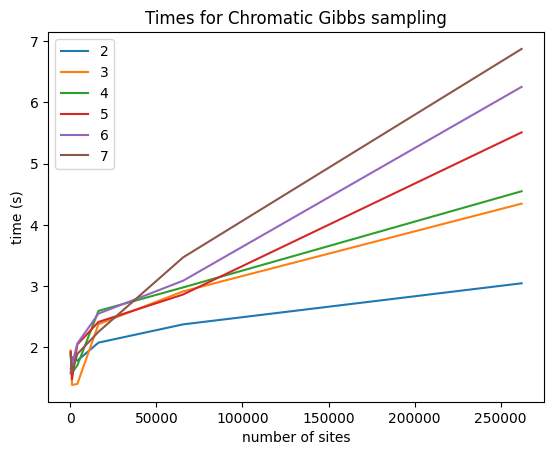

In [2]:
plot_benchmark(Ks, sizes, times, title="Times for Chromatic Gibbs sampling")